# Inference test (by my dataloader)

In [9]:
import sys
sys.path.insert(0, '../')

import numpy as np
import torch
from torch.autograd import Variable
from FuseNet import FuseNet, CrossEntropy2d
from Solver_FuseNet import Solver_SS
import torch.nn.functional as F
from utils.data_utils_class import get_data

from dataloaders.NYUDv2Loader import *

%matplotlib inline
from utils.visual_utils import *
gpu_device = 1

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
gpu_device = 2
torch.cuda.set_device(gpu_device)

In [11]:
data_visualizer = DataVisualizer()

v_loader = NYUDv2Loader('/home/dongwonshin/Desktop/Datasets/NYUDv2/', split='val', is_transform=True, img_norm=True, img_size=(240,320))
val_loader = data.DataLoader(v_loader, batch_size=4, num_workers=16)

In [12]:
model = FuseNet(14).cuda()

In [13]:
checkpoint = torch.load('../models/by my dataloader/nyu/checkpoint25.pth.tar')
model.load_state_dict(checkpoint['state_dict']) 

for data in val_loader:

    rgb_inputs  = Variable(data[0].cuda(gpu_device))
    d_inputs    = Variable(data[1].cuda(gpu_device))
    labels      = Variable(data[2].cuda(gpu_device))
    
    result = model.forward(rgb_inputs, d_inputs)    
    break;
    
label_results = np.argmax(result.cpu().detach().numpy(),axis=1)

Exception NameError: "global name 'FileNotFoundError' is not defined" in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa8af72b810>> ignored


In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

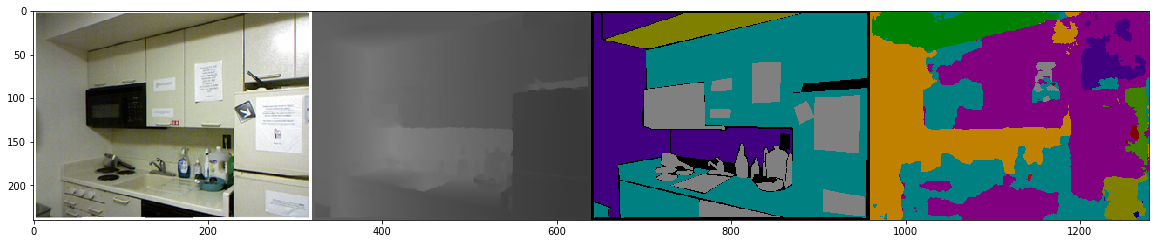

In [15]:
idx = 1
data_visualizer.visualize_all(rgb_inputs[idx], d_inputs[idx], labels[idx], label_results[idx])

# Inference test (by their dataloader)

In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
import torch
from torch.autograd import Variable
from FuseNet import FuseNet, CrossEntropy2d
from Solver_FuseNet import Solver_SS
import torch.nn.functional as F
from utils.data_utils_class import get_data

%matplotlib inline
from utils.visual_utils import *

%load_ext autoreload
%autoreload 2

In [2]:
gpu_device = 2
torch.cuda.set_device(gpu_device)

In [3]:
resume = False
dset_type = 'NYU'
train_data, test_data = get_data(dset_type=dset_type)
print ("[PROGRESS] %s dataset retrieved"  %(dset_type))

train_loader    = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=1)
test_loader     = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=1)

[PROGRESS] NYU dataset retrieved


In [4]:
# it should be 40!
model = FuseNet(40).cuda() 

In [5]:
checkpoint = torch.load('../models/nyu/checkpoint25.pth.tar')
model.load_state_dict(checkpoint['state_dict']) 

for data in test_loader:

    rgb_inputs  = Variable(data[0].cuda(gpu_device))
    d_inputs    = Variable(data[1].cuda(gpu_device))
    labels      = Variable(data[2].cuda(gpu_device))
    
    result = model.forward(rgb_inputs, d_inputs)    
    break;
    
label_results = np.argmax(result.cpu().detach().numpy(),axis=1)

Exception NameError: "global name 'FileNotFoundError' is not defined" in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f515a1e1090>> ignored


In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [7]:
data_visualizer = DataVisualizer()

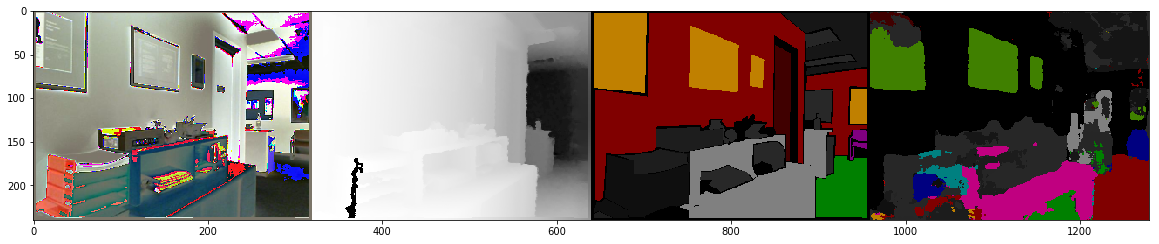

In [8]:
idx = 2
data_visualizer.visualize_all(rgb_inputs[idx], d_inputs[idx], labels[idx], label_results[idx])


# 2018년 07월 21일 18시 48분 59초에 추가 #

두 가지 모두 결과가 왜 만족스럽지 않게 나올까?  
결과를 추출하는데서 문제가 있는걸까? 아니면 모델이 잘못구현된걸까?